In [ ]:
import pandas as pd

In [357]:
df_list = []
#SRR_list = open("/data/lohia/gene_distance_expresseion/hi_c_data_processing/software/SRR_list.sh", "r")
#SRR_list = open("/data/lohia/gene_distance_expresseion/hi_c_data_processing/software/50_exp_split/grouped_filenames.sh", "r")
SRR_list = ['chunks20_%s' %x for x in range(1,65)] + ['chunks50_%s' %x for x in range(1,26)]  + ['chunks100_%s' %x for x in range(1,13)] + ['chunks200_%s' %x for x in range(1,8)] + ['chunks400_%s' %x for x in range(1,5)] + ['1300_agg_EXP']
#print (SRR_list)
#SRR_list = ['chunks20_64', 'chunks50_25',  'chunks100_12', 'chunks200_7','chunks400_4', '800_agg_EXP', '1000_agg_EXP', '1300_agg_EXP'] 
#SRR_name = [0, 1, 2, 3, 4, 5,6,7] 
counter = 0
#for chunk in [1, 10, 100, 200, 300, 400, 500, 600, 700, 727]:
#for chunk in [727]:
for chunk in [1]:
    for i in range(1,2):
        for resolution in [10]:
            #for network_type in ['VC_lib_tss', 'VC_rank_tss', 'VC_tss']:
            for network_type in ['VC_tss']:
                #for selected_feature in ['edge_compartment', 'gene_pair_type', 'exp_mean', 'exp_diff', 'jaccard_coefficient', 'jac_denom', 'common_neighbors', 'degree_avg_', 'degree_diff_',  'indirect_parameters', 'shortest_path' , 'clustering_avg_' , 'clustering_diff_' , 'closeness_centrality_avg_' , 'closeness_centrality_diff_' , 'betweenness_centrality_avg_' ,  'betweenness_centrality_diff_', 'all', 'CN_CA_CC', 'strand_type', 'avg_gene_length', 'diff_gene_length', 'CA_CN', 'CC_CN', 'CA_CC']:
                #for selected_feature in ['jaccard_coefficient' , 'clustering_avg_' , 'closeness_centrality_avg_' , 'jac_denom', 'common_neighbors', 'degree_avg_', 'CN_CA_CC', 'all']:
                #for selected_feature in ['edge_compartment', 'gene_pair_type', 'exp_mean', 'strand_type', 'avg_gene_length']:
                for selected_feature in ['edge_compartment']:
                    df_agg = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/results/gene_basis_auc/simple_auc_compartment_SRA_study_agg.sh_10_VC_rank_tss_90_entire_genes.txt" , sep="\t", header=None, names= ['resol','chr', 'auc', 'accuracy', 'norm', 'auc_b', 'auc_mix'])
                    df_agg['data'] = i
                    df_agg['chunk'] = chunk
                    df_agg['dataset'] = 'agg'
                    df_agg['feature'] = selected_feature
                    df_agg['resolution'] = resolution
                    df_list.append(df_agg)

df_ind = pd.concat(df_list)

In [368]:
df_ind.groupby(['chr'])['auc'].mean().mean()

0.5393941983262004

In [367]:
df_ind.groupby(['chr'])['auc_b'].mean().mean()

0.5220539814683613

In [366]:
df_ind.groupby(['chr'])['auc_mix'].mean().mean() - 1

-0.5614481797945613

In [354]:
y = pd.read_hdf('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data/SRA_study_agg.sh_10KB/chr16_resolution10_entire_genes_comp.h5')

In [355]:
y

principal component 1  principal component 2  principal component 3  \
0                 33.841434               1.962722               2.280211   
1                 33.841434               1.962722               2.280211   
2                 33.841434               1.962722               2.280211   
3                 11.756791              12.774926               1.409979   
4                 25.282072               5.430932               2.535458   
...                     ...                    ...                    ...   
2550              20.819581              -2.407280               2.518576   
2551              21.977337              -2.815255               2.735017   
2552              11.000119               1.774086               1.545849   
2553              -1.984542               9.139568               1.482438   
2554              11.000119               1.774086               1.545849   

           v1        v2        v3           gene_x  
0     0.72912  0.240465  0.015743  ENSG00000233614  
1     0.72912  0.240465  0.015743  ENSG00000234769  
2     0.72912  0.240465  0.015743  ENSG00000278739  
3     0.72912  0.240465  0.015743  ENSG00000260803  
4     0.72912  0.240465  0.015743  ENSG00000231439  
...       ...       ...       ...              ...  
2550  0.72912  0.240465  0.015743  ENSG00000261172  
2551  0.72912  0.240465  0.015743  ENSG00000222359  
2552  0.72912  0.240465  0.015743  ENSG00000277349  
2553  0.72912  0.240465  0.015743  ENSG00000260528  
2554  0.72912  0.240465  0.015743  ENSG00000260923  

[2555 rows x 7 columns]

In [343]:
z = y.to_numpy()

In [350]:
l = z[[0,1,1000],:]

In [351]:
pd.DataFrame(l)

0          1         2         3         4         5
0  15.609143  -8.817542  0.633695  0.610149  0.349395  0.034889
1  15.597997  -8.793176  0.576855  0.610149  0.349395  0.034889
2  -2.994780 -11.319454  1.294689  0.610149  0.349395  0.034889

In [635]:
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software//SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
diff_list = []
df_list = []
study = []
tissue_list = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
for networks_s in networks_list:
    for tissue in tissue_list:
        sig_var = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr2_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}.hdf")
        sig_var['diff'] = sig_var['diff'].abs()
        sig_var = sig_var[sig_var['diff'] > 30]
        sig_var['study'] = networks_s.split()[0]
        sig_var['tissue'] = tissue.split()[0]
        fraction = sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 25]['hi-c']]) / sig_var[sig_var['diff'] > 25].shape[0]
        fraction_list.append(sig_var[sig_var['diff'] > 25]['hi-c'].mean())
        fraction_random = sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 25]['hi-c-random']]) / sig_var[sig_var['diff'] > 25].shape[0]
        fraction_random_list.append(sig_var[sig_var['diff'] > 25]['hi-c-random'].mean())
        fraction_diff_list.append(sig_var[sig_var['diff'] > 25]['hi-c'].mean() - sig_var[sig_var['diff'] > 25]['hi-c-random'].mean())
        study.append(tissue.split()[0])
        df_list.append(sig_var)
        print (1)
    l

KeyboardInterrupt: 

In [ ]:
all_study = pd.concat(df_list)

In [723]:
all_study[all_study['diff_2'] == 37][['tss_distance']]

tss_distance
223322       -365193
229391       -371613
229392       -371576
229393       -371122
229394       -370593
...              ...
333762       -372930
333763       -371898
333764       -370059
335271       -362257
336376       -367362

[11705 rows x 1 columns]

In [647]:
all_study['chr'].nunique()

1

In [598]:
all_study['slope_m'] = all_study['slope'].abs()

In [642]:
all_study_2 = all_study[all_study['chr'] == 10]

In [699]:
all_study['diff_2'] = all_study['tss_bin'] - all_study['tss_var_bin']

<AxesSubplot:xlabel='hi-c', ylabel='Count'>

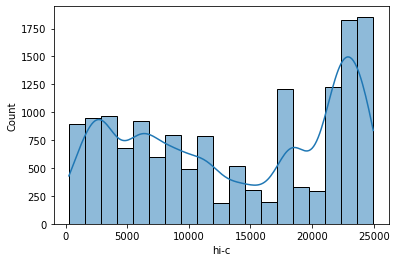

In [788]:
sns.histplot(all_study[all_study['diff_2'] == -31]['hi-c'], kde=True)

<AxesSubplot:xlabel='hi-c', ylabel='Count'>

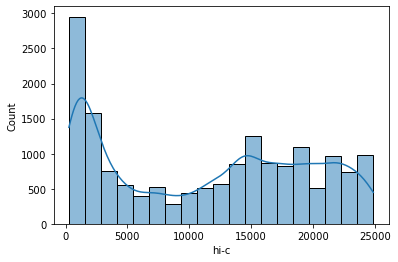

In [789]:
sns.histplot(all_study[all_study['diff_2'] == 31]['hi-c'], kde=True)

In [726]:
all_study[all_study['diff_2'] == -31]['hi-c']

221671    23456.0
222897      274.5
222898      274.5
233331    20032.0
233332    20032.0
           ...   
337055    24000.0
337056    24000.0
340136     5392.0
341653    19952.0
342050    19920.0
Name: hi-c, Length: 15027, dtype: float64

In [727]:
all_study[all_study['diff_2'] == 31]['hi-c']

224292      274.5
224595      274.5
228612    23264.0
229436     4528.0
229437     4528.0
           ...   
333821    14088.0
333822    14088.0
333823    14088.0
333824    14088.0
341666    12240.0
Name: hi-c, Length: 16634, dtype: float64

<AxesSubplot:xlabel='hi-c', ylabel='Count'>

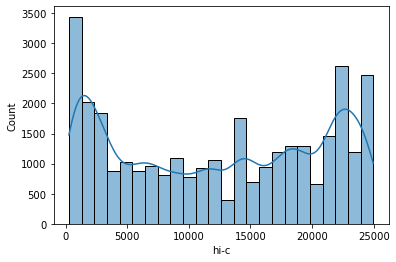

In [700]:
sns.histplot(all_study[all_study['diff'] == 31]['hi-c'], kde=True)

In [688]:
all_study[all_study['diff'] == 37]['hi-c']

221889    24160.0
221890    24160.0
221891    24160.0
221892    24160.0
221893    24160.0
           ...   
333763    16960.0
333764    16960.0
335271    14688.0
336376    15408.0
342052    24144.0
Name: hi-c, Length: 21361, dtype: float64

In [782]:
for bin_diff in range(31, 40):
    print (all_study[all_study['diff_2'] == bin_diff]['hi-c'].mean())

11413.631056871469
12732.810870525851
12835.216277348249
11294.972062926225
10383.701285306252
8459.70050312755
10159.251730029902
11655.191234256927
11826.239797566492


In [783]:
for bin_diff in range(31, 40):
    print (all_study[all_study['diff_2'] == -bin_diff]['hi-c'].mean())

13691.805882744393
13889.451077295029
14221.435991140643
14158.46097071801
12672.582064433404
14135.124090006619
13705.843050952775
13258.322442588726
13306.916096622488


In [ ]:
sns.scatterplot(data=all_study[all_study['diff'] == 31], y='slope', x='hi-c')

<AxesSubplot:xlabel='hi-c', ylabel='slope_m'>

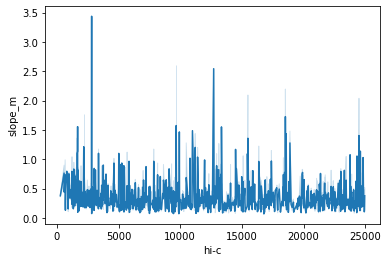

In [603]:
sns.lineplot(data=all_study[all_study['diff'] == 31], y='slope_m', x='hi-c')

In [572]:
all_study = pd.concat(df_list)
all_study['value'] = all_study['hi-c'] - all_study['hi-c-random']
all_study['value_dig'] = [1 if x>0 else -1 if x<0 else np.nan for x in all_study['value']]

all_study['diff_dig'] = all_study['diff']/10
all_study['diff_dig'] = all_study['diff_dig'].astype(int)
all_study['count'] = 1

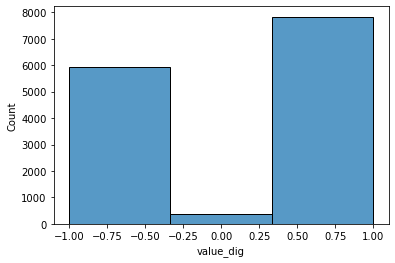

In [433]:
ax = sns.histplot(data=all_study[all_study['diff'] > 30]['value_dig'], bins=3, )
#ax.set_ylim([0,40000])

In [531]:
df = all_study.groupby(['value_dig', 'diff_dig', 'tissue'])['count'].sum().reset_index()

In [476]:
df

value_dig  diff_dig                                             tissue  \
0         -1.0         2  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
1         -1.0         2  Adipose_Visceral_Omentum.v8.signif_variant_gen...   
2         -1.0         2  Adrenal_Gland.v8.signif_variant_gene_pairs.txt.gz   
3         -1.0         2   Artery_Aorta.v8.signif_variant_gene_pairs.txt.gz   
4         -1.0         2  Artery_Coronary.v8.signif_variant_gene_pairs.t...   
..         ...       ...                                                ...   
866        1.0        10        Stomach.v8.signif_variant_gene_pairs.txt.gz   
867        1.0        10         Testis.v8.signif_variant_gene_pairs.txt.gz   
868        1.0        10        Thyroid.v8.signif_variant_gene_pairs.txt.gz   
869        1.0        10         Vagina.v8.signif_variant_gene_pairs.txt.gz   
870        1.0        10    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   

     count  
0     3504  
1     2336  
2      630  
3     1971  
4      491  
..     ...  
866     12  
867     20  
868     18  
869      4  
870     36  

[871 rows x 4 columns]

In [533]:
d3 = df.merge(d2[['tissue', 'count']], left_on='tissue', right_on='tissue')

In [511]:
d3

value_dig  diff_dig                                             tissue  \
0         -1.0         2  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
1         -1.0         3  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
2         -1.0         4  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
3         -1.0         5  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
4         -1.0         6  Adipose_Subcutaneous.v8.signif_variant_gene_pa...   
..         ...       ...                                                ...   
866        1.0         6    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   
867        1.0         7    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   
868        1.0         8    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   
869        1.0         9    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   
870        1.0        10    Whole_Blood.v8.signif_variant_gene_pairs.txt.gz   

     count_x  count_y     count  
0       3504    38197  0.091735  
1       4995    38197  0.130769  
2       3266    38197  0.085504  
3       2211    38197  0.057884  
4       1310    38197  0.034296  
..       ...      ...       ...  
866     1609    37242  0.043204  
867     1668    37242  0.044788  
868      736    37242  0.019763  
869      731    37242  0.019628  
870       36    37242  0.000967  

[871 rows x 6 columns]

In [534]:
d3['count']= d3['count_x'] / d3['count_y']

In [532]:
d2 = all_study.groupby(['tissue'])['count'].sum().reset_index()

In [545]:
d4 = d3[d3['tissue']=='Whole_Blood.v8.signif_variant_gene_pairs.txt.gz']

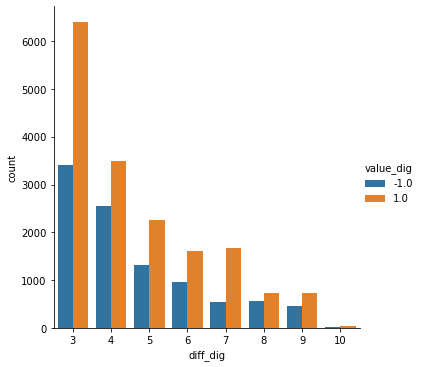

In [553]:
sns.catplot(data=df[df['tissue']=='Whole_Blood.v8.signif_variant_gene_pairs.txt.gz'], hue='value_dig', y='count', x= 'diff_dig', kind='bar')

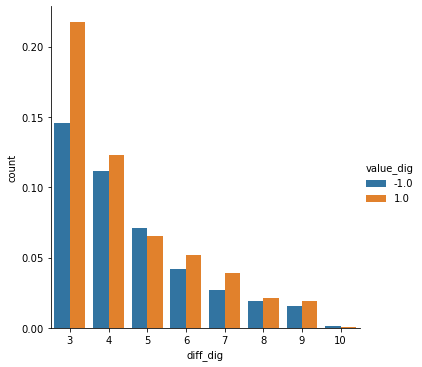

In [552]:
sns.catplot(data=d3, hue='value_dig', y='count', x= 'diff_dig', kind='bar', ci=None)

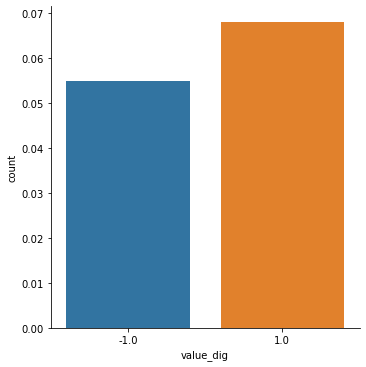

In [551]:
sns.catplot(data=d3, x='value_dig', y='count', kind='bar', ci=None)

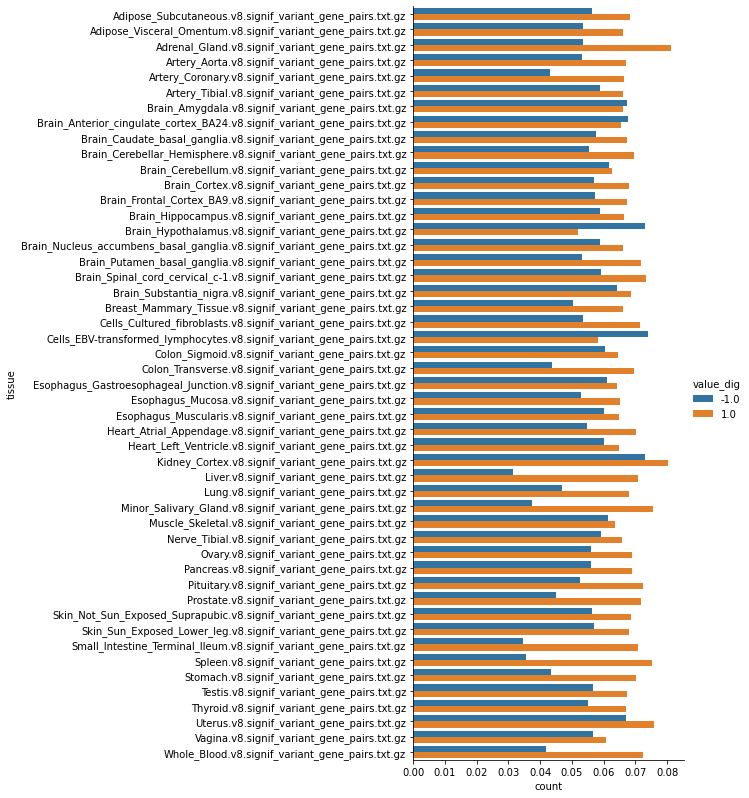

In [541]:
#fig, axes = plt.subplots(figsize=(20,5))
sns.catplot(data=d3, hue='value_dig', x='count', y= 'tissue', kind='bar',orient="h", ci=None, aspect=.9, height=11)

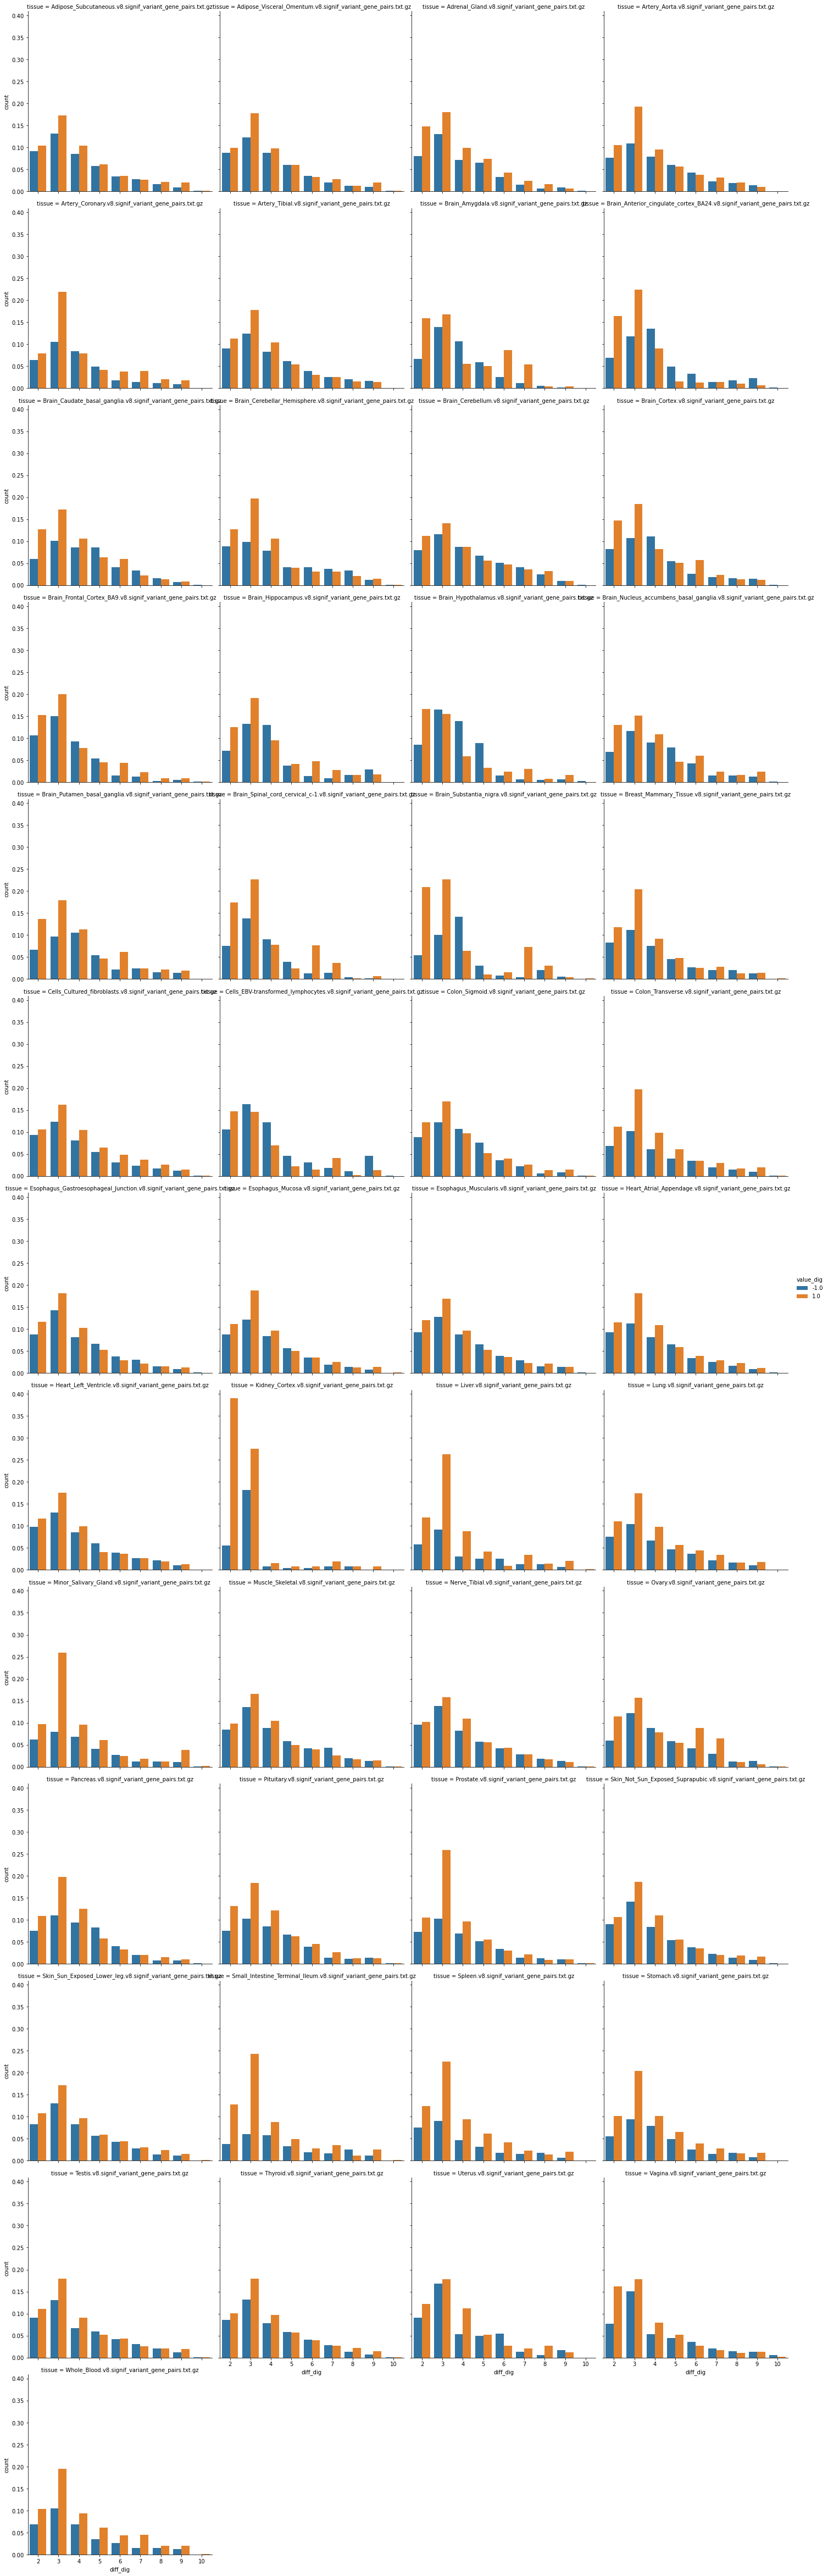

In [513]:
sns.catplot(data=d3, hue='value_dig', y='count', x= 'diff_dig', kind='bar', col='tissue', col_wrap=4)

<AxesSubplot:xlabel='diff_dig', ylabel='hi-c'>

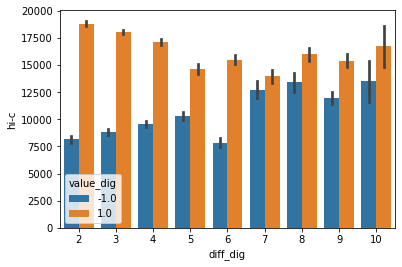

In [444]:
sns.barplot(data=all_study, hue='value_dig', y='hi-c', x= 'diff_dig')

<AxesSubplot:xlabel='diff_dig', ylabel='hi-c-random'>

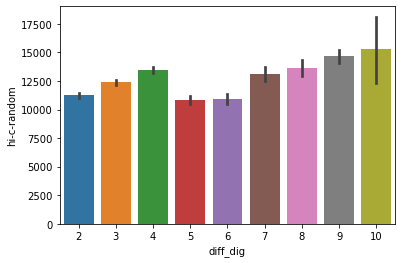

In [427]:
sns.barplot(data=all_study, x='diff_dig', y='hi-c-random' )

In [371]:
fraction_diff_list

[966.5829587249682,
 1061.0186623075879,
 538.5876583571717,
 431.5616401035277,
 806.3032284429919,
 38.59719384280106,
 779.1562457430864,
 613.2826590382774,
 387.98092902874305,
 541.836262089635,
 397.6861463015939,
 926.5234981610138,
 531.0828225037458,
 630.8775371202846,
 999.4314126140853,
 838.9174499387009,
 824.9231712300771,
 601.4730963084039,
 968.95368478409,
 797.8348998774018,
 142.18348998774127,
 964.5704944830395,
 662.5308541070699,
 479.04794987058995,
 1081.9391091132002,
 783.042228579212,
 736.7891295463833,
 644.1954774553869,
 610.5877945783959,
 1309.8615992371615,
 506.37733278844826,
 1276.803705217273,
 890.0378695000691]

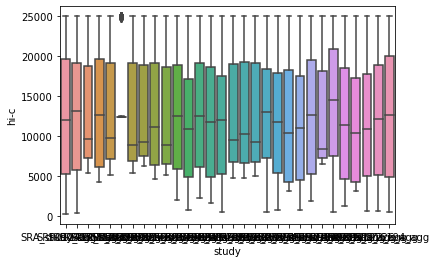

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(data=all_study, y='hi-c', x='study')

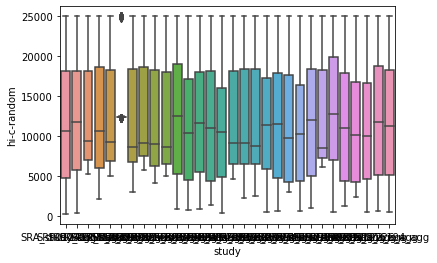

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(data=all_study, y='hi-c-random', x='study')

In [293]:
all_study['hi-c'].mean()

12402.473562932517

In [294]:
all_study['hi-c-random'].mean()

11887.552423837824

In [275]:
df = all_study[all_study['hi-c'] > 1000]

In [279]:
df = df.groupby(['variant_id', 'gene_id'])['hi-c'].count().reset_index()

In [288]:
df['pair'] = 

variant_id          gene_id  hi-c
0       chr2_100025011_C_T_b38  ENSG00000144214    30
1       chr2_100051672_T_A_b38  ENSG00000144214    30
2       chr2_100268431_T_C_b38  ENSG00000204634    30
3      chr2_100268669_TC_T_b38  ENSG00000204634    30
4       chr2_100270737_C_T_b38  ENSG00000115514    30
...                        ...              ...   ...
38192    chr2_99800103_C_A_b38  ENSG00000144218    30
38193    chr2_99801172_C_T_b38  ENSG00000144218    30
38194    chr2_99824056_C_A_b38  ENSG00000230393    30
38195    chr2_99839085_C_T_b38  ENSG00000144214    30
38196    chr2_99883705_C_T_b38  ENSG00000144214    30

[38197 rows x 3 columns]

In [287]:
sig_var

variant_id          gene_id  tss_distance  \
221670           chr2_534069_C_T_b38  ENSG00000035115        267671   
221671           chr2_571068_C_A_b38  ENSG00000035115        304670   
221672           chr2_930758_A_G_b38  ENSG00000035115        664360   
221712           chr2_610603_T_C_b38  ENSG00000189292        321752   
221713         chr2_613046_C_CAT_b38  ENSG00000189292        324195   
...                              ...              ...           ...   
413141        chr2_241825623_A_G_b38  ENSG00000220804       -263010   
413142        chr2_241828684_C_T_b38  ENSG00000220804       -259949   
413143        chr2_241828838_G_A_b38  ENSG00000220804       -259795   
413144  chr2_241828903_T_TATAATA_b38  ENSG00000220804       -259730   
413145        chr2_241829564_A_G_b38  ENSG00000220804       -259069   

        ma_samples  ma_count       maf  pval_nominal     slope  slope_se  \
221670          30        30  0.025818  5.824930e-05  0.432475  0.106684   
221671          32        32  0.027539  6.863110e-05  0.418329  0.104216   
221672          32        32  0.027539  2.166150e-05  0.445334  0.103882   
221712         182       201  0.172978  4.099660e-05 -0.156422  0.037803   
221713         179       197  0.169535  1.950160e-04 -0.144506  0.038507   
...            ...       ...       ...           ...       ...       ...   
413141         360       448  0.385542  2.206330e-06 -0.243411  0.050835   
413142         251       286  0.246127  2.982070e-11 -0.383633  0.056439   
413143         263       304  0.261618  1.695630e-11 -0.381979  0.055476   
413144          40        43  0.041267  5.213820e-29 -1.350870  0.113480   
413145         251       286  0.246127  2.982070e-11 -0.383633  0.056439   

        pval_nominal_threshold  ...    tss_var        tss tss_random tss_bin  \
221670                0.000279  ...     534069     266398      -1273      26   
221671                0.000279  ...     571068     266398     -38272      26   
221672                0.000279  ...     930758     266398    -397962      26   
221712                0.000277  ...     610603     288851     -32901      28   
221713                0.000277  ...     613046     288851     -35344      28   
...                        ...  ...        ...        ...        ...     ...   
413141                0.000372  ...  241825623  242088633  242351643   24208   
413142                0.000372  ...  241828684  242088633  242348582   24208   
413143                0.000372  ...  241828838  242088633  242348428   24208   
413144                0.000372  ...  241828903  242088633  242348363   24208   
413145                0.000372  ...  241829564  242088633  242347702   24208   

        tss_random_bin  tss_var_bin  diff  hi-c-random     hi-c   thresh  
221670               0           53    27        258.0  23072.0  23696.0  
221671              -3           57    31      22336.0  23456.0  23696.0  
221672             -39           93    67       3976.0  16848.0  23696.0  
221712              -3           61    33      16672.0  23504.0  23696.0  
221713              -3           61    33      16672.0  23504.0  23696.0  
...                ...          ...   ...          ...      ...      ...  
413141           24219        24182    26       1922.0    258.0  23696.0  
413142           24219        24182    26       1922.0    258.0  23696.0  
413143           24219        24182    26       1922.0    258.0  23696.0  
413144           24219        24182    26       1922.0    258.0  23696.0  
413145           24219        24182    26       1922.0    258.0  23696.0  

[38197 rows x 23 columns]

In [282]:
all_study

variant_id          gene_id  tss_distance  \
221670           chr2_534069_C_T_b38  ENSG00000035115        267671   
221671           chr2_571068_C_A_b38  ENSG00000035115        304670   
221672           chr2_930758_A_G_b38  ENSG00000035115        664360   
221712           chr2_610603_T_C_b38  ENSG00000189292        321752   
221713         chr2_613046_C_CAT_b38  ENSG00000189292        324195   
...                              ...              ...           ...   
413141        chr2_241825623_A_G_b38  ENSG00000220804       -263010   
413142        chr2_241828684_C_T_b38  ENSG00000220804       -259949   
413143        chr2_241828838_G_A_b38  ENSG00000220804       -259795   
413144  chr2_241828903_T_TATAATA_b38  ENSG00000220804       -259730   
413145        chr2_241829564_A_G_b38  ENSG00000220804       -259069   

        ma_samples  ma_count       maf  pval_nominal     slope  slope_se  \
221670          30        30  0.025818  5.824930e-05  0.432475  0.106684   
221671          32        32  0.027539  6.863110e-05  0.418329  0.104216   
221672          32        32  0.027539  2.166150e-05  0.445334  0.103882   
221712         182       201  0.172978  4.099660e-05 -0.156422  0.037803   
221713         179       197  0.169535  1.950160e-04 -0.144506  0.038507   
...            ...       ...       ...           ...       ...       ...   
413141         360       448  0.385542  2.206330e-06 -0.243411  0.050835   
413142         251       286  0.246127  2.982070e-11 -0.383633  0.056439   
413143         263       304  0.261618  1.695630e-11 -0.381979  0.055476   
413144          40        43  0.041267  5.213820e-29 -1.350870  0.113480   
413145         251       286  0.246127  2.982070e-11 -0.383633  0.056439   

        pval_nominal_threshold  ...    tss_var        tss tss_random tss_bin  \
221670                0.000279  ...     534069     266398      -1273      26   
221671                0.000279  ...     571068     266398     -38272      26   
221672                0.000279  ...     930758     266398    -397962      26   
221712                0.000277  ...     610603     288851     -32901      28   
221713                0.000277  ...     613046     288851     -35344      28   
...                        ...  ...        ...        ...        ...     ...   
413141                0.000372  ...  241825623  242088633  242351643   24208   
413142                0.000372  ...  241828684  242088633  242348582   24208   
413143                0.000372  ...  241828838  242088633  242348428   24208   
413144                0.000372  ...  241828903  242088633  242348363   24208   
413145                0.000372  ...  241829564  242088633  242347702   24208   

        tss_random_bin  tss_var_bin  diff  hi-c-random     hi-c   thresh  
221670               0           53    27        258.0  23072.0  23696.0  
221671              -3           57    31      22336.0  23456.0  23696.0  
221672             -39           93    67       3976.0  16848.0  23696.0  
221712              -3           61    33      16672.0  23504.0  23696.0  
221713              -3           61    33      16672.0  23504.0  23696.0  
...                ...          ...   ...          ...      ...      ...  
413141           24219        24182    26        493.0    562.0  23728.0  
413142           24219        24182    26        493.0    562.0  23728.0  
413143           24219        24182    26        493.0    562.0  23728.0  
413144           24219        24182    26        493.0    562.0  23728.0  
413145           24219        24182    26        493.0    562.0  23728.0  

[1145910 rows x 23 columns]

In [269]:
fraction_list

[0.5665889991360578,
 0.6182946304683614,
 0.4670785663795586,
 0.5500693771762181,
 0.4906929863601854,
 1.0,
 0.46309919627195856,
 0.423174594863471,
 0.515433149200199,
 0.4596696075608032,
 0.599392622457261,
 0.5400685917742231,
 0.5870879912034976,
 0.5675053014634657,
 0.5850721260832003,
 0.491452208288609,
 0.5012173730921277,
 0.4903002853627248,
 0.6378249600753986,
 0.5652014556116972,
 0.5108516375631594,
 0.5380527266539257,
 0.5777417074639369,
 0.36262010105505665,
 0.6649475089666728,
 0.5528444642249392,
 0.5159043903971516,
 0.5347016781422624,
 0.5757258423436395,
 0.5864334895410634]

In [242]:
sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 5]['hi-c']]) / sig_var[sig_var['diff'] > 5].shape[0]

0.5516990732327821

In [243]:
sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 5]['hi-c-random']]) / sig_var[sig_var['diff'] > 5].shape[0]

0.5231691804470289

In [241]:
sig_var = pd.read_hdf("/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr19_tss_tss_10_VC_rank_entire_genes_SRA_study_agg.sh.hdf")
sig_var['diff'] = sig_var['diff'].abs()

In [14]:
egene = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/Whole_Blood.v8.egenes.txt.gz",sep='\t')

In [21]:
egene[egene['gene_id']=='ENSG00000227232.5']

gene_id gene_name gene_chr  gene_start  gene_end strand  num_var  \
0  ENSG00000227232.5    WASH7P     chr1       14410     29553      -     1364   

   beta_shape1  beta_shape2  true_df  ...  pval_nominal     slope  slope_se  \
0      1.02477      310.949  540.117  ...  3.851330e-13  0.489662  0.065936   

  pval_perm     pval_beta          qval pval_nominal_threshold  log2_aFC  \
0    0.0001  1.052580e-09  1.257730e-09               0.000393  0.711097   

  log2_aFC_lower  log2_aFC_upper  
0       0.496614         0.85436  

[1 rows x 33 columns]

In [16]:
egene.columns

Index(['gene_id', 'gene_name', 'gene_chr', 'gene_start', 'gene_end', 'strand',
       'num_var', 'beta_shape1', 'beta_shape2', 'true_df', 'pval_true_df',
       'variant_id', 'tss_distance', 'chr', 'variant_pos', 'ref', 'alt',
       'num_alt_per_site', 'rs_id_dbSNP151_GRCh38p7', 'minor_allele_samples',
       'minor_allele_count', 'maf', 'ref_factor', 'pval_nominal', 'slope',
       'slope_se', 'pval_perm', 'pval_beta', 'qval', 'pval_nominal_threshold',
       'log2_aFC', 'log2_aFC_lower', 'log2_aFC_upper'],
      dtype='object')

In [ ]:
import argparse
import os
import shutil
import numpy as np
import pandas as pd
import numpy as np
import scipy.spatial.distance as ssd
import gc
import h5py
import itertools
import scipy.stats as stats
from scipy.io import mmread
from scipy import sparse, io
from scipy.sparse import csr_matrix, triu, coo_matrix
import numpy as np
#from hic_normalization import *
import sys

base_folder = '/sonas-hs/gillis/hpc/data/lohia'
study_id = 'SRA_study_agg.sh'
input_network_norm_type = 'VC_rank'
resoulution_in_kb = 10
chrom = 'chr6'


rank_n_tmp  = sparse.load_npz(f"{base_folder}/hi_c_data_processing/data/{study_id}_{resoulution_in_kb}KB/normalized_and_mapped/{chrom}_tss_tss_{resoulution_in_kb}_{input_network_norm_type}_entire_genes_{study_id}.npz")

rank_n  = sparse.csr_matrix.transpose(rank_n_tmp) + sparse.triu(rank_n_tmp, k=1, format='csr')

In [ ]:
thresh = np.percentile(rank_n.toarray()[1,2], 90)

In [ ]:
rank_n

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(rank_n.toarray(), metric = "hamming")
# optionally convert it to a DataFrame
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)

In [739]:
rank_n.toarray()

array([[    0. ,   202.5,   238. , ...,  3976. ,  3976. ,  3976. ],
       [  202.5,     0. ,  9200. , ..., 24848. , 11520. ,  3976. ],
       [  238. ,  9200. ,     0. , ..., 23360. ,  3976. ,  3976. ],
       ...,
       [ 3976. , 24848. , 23360. , ...,     0. ,   567. ,  1263. ],
       [ 3976. , 11520. ,  3976. , ...,   567. ,     0. ,  1056. ],
       [ 3976. ,  3976. ,  3976. , ...,  1263. ,  1056. ,     0. ]],
      dtype=float32)

In [651]:
gene_folder = "hi_c_data_processing/software/gene_tx_map"
gene_file = "gencodev32_hg38_known_gene_%s_order.tsv" %chrom
gene_data = pd.read_csv("%s/%s/%s" %(base_folder, gene_folder, gene_file), sep='\t',
                                header=0, index_col=None)
gene_data.set_index('Gene stable ID', inplace=True)


In [766]:
gene_data['gene_range'] = gene_data['txStart_outer'] - gene_data['txEnd_outer']

In [768]:
gene_data['gene_range'] = gene_data['gene_range'].abs()

<AxesSubplot:xlabel='gene_range', ylabel='Count'>

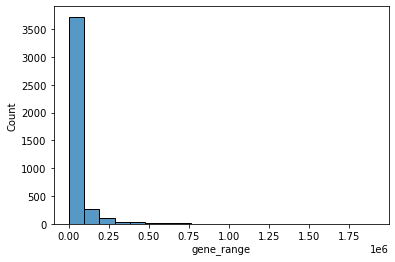

In [771]:
sns.histplot(gene_data['gene_range'],bins=20)

In [772]:
for bin_diff in range(1000, 1010):
    gene_data['bin'] = gene_data['txStart_outer'] /(resoulution_in_kb*1000)
    gene_data['bin'] = gene_data['bin'].astype('int')
    gene_data['bin'] = gene_data['bin'] + bin_diff
    gene_index = gene_data['bin'].to_list()
    #print (bin_diff)
    print (rank_n.diagonal(k=-bin_diff)[gene_index[0:-bin_diff]].mean())

12688.904
12721.268
12558.419
12657.779
12741.21
12545.938
12778.336
12659.189
12674.807
12604.894


<AxesSubplot:ylabel='Count'>

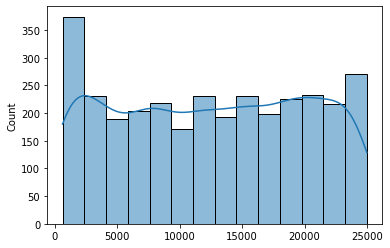

In [774]:
sns.histplot(rank_n.diagonal(k=-bin_diff)[gene_index[0:-bin_diff]], kde=True)

In [773]:
for bin_diff in range(1000, 1010):
    gene_data['bin'] = gene_data['txStart_outer'] /(resoulution_in_kb*1000)
    gene_data['bin'] = gene_data['bin'].astype('int')
    gene_data['bin'] = gene_data['bin'] - bin_diff
    gene_index = gene_data['bin'].to_list()
    #print (bin_diff)
    print (rank_n.diagonal(k=bin_diff)[gene_index[bin_diff::]].mean())

12427.135
12462.741
12321.155
12331.203
12468.29
12340.376
12343.852
12466.946
12401.492
12487.011


<AxesSubplot:ylabel='Count'>

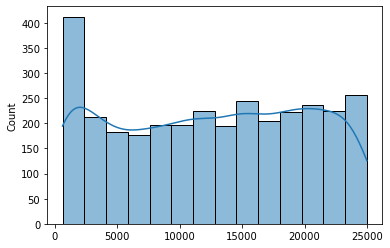

In [775]:
sns.histplot(rank_n.diagonal(k=bin_diff)[gene_index[bin_diff::]], kde=True)

In [557]:
rank_n.diagonal(k=30)

array([ 144., 1333., 1087., ..., 1324., 1144.,  144.], dtype=float32)

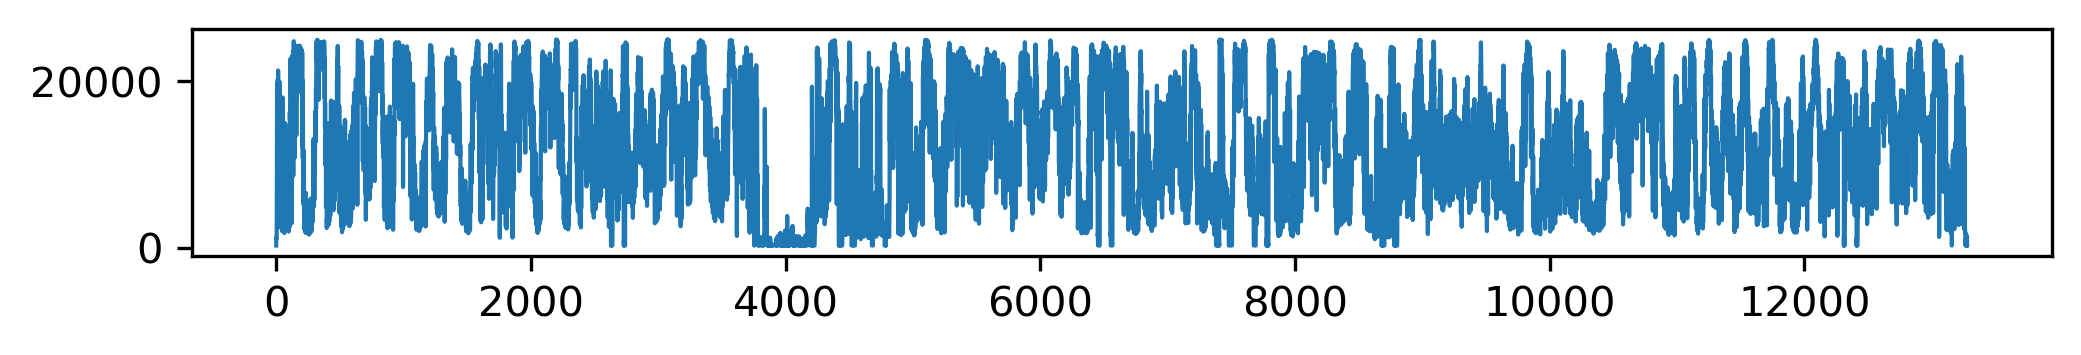

In [565]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 1),sharey=True, dpi=300) 
ax.plot(rank_n.diagonal(k=100), lw=1)

<AxesSubplot:ylabel='Count'>

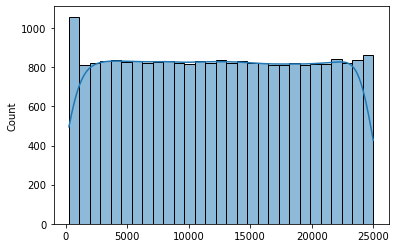

In [744]:
sns.histplot(rank_n.diagonal(k=-32), kde=True)

In [694]:
rank_n.diagonal(k=49)[gene_index].mean()

11869.489

In [618]:
rank_n.diagonal(k=30)

array([ 144., 1333., 1087., ..., 1324., 1144.,  144.], dtype=float32)

In [619]:
rank_n.diagonal(k=30)[[0,1,2]]

array([ 144., 1333., 1087.], dtype=float32)

In [555]:
rank_n.toarray()

array([[    0. ,   121.5,   149. , ...,  1034. ,  1034. ,  1034. ],
       [  121.5,     0. ,   437. , ...,  1034. , 11704. ,  1034. ],
       [  149. ,   437. ,     0. , ...,  1034. ,  1034. ,  1034. ],
       ...,
       [ 1034. ,  1034. ,  1034. , ...,     0. ,   788. ,   917. ],
       [ 1034. , 11704. ,  1034. , ...,   788. ,     0. ,   431. ],
       [ 1034. ,  1034. ,  1034. , ...,   917. ,   431. ,     0. ]],
      dtype=float32)

In [304]:
def covcsr(x):
    '''return covariance matrix, assumes column variable'''
    meanx = x.sum(axis=0)/float(x.shape[0])
    return ((x.T*x)/x.shape[0] - meanx.T*meanx)

def corrcoefcsr(x):
    covx = covcsr(x)
    stdx = np.sqrt(np.diag(covx))[np.newaxis,:]
    return covx/(stdx.T * stdx)

In [ ]:
corr_mat = sparse.csr_matrix(corrcoefcsr(rank_n))

In [ ]:
    corr_mat = sparse.csr_matrix(corrcoefcsr(lib_n))
    
    
    mask = np.all(np.isnan(corr_mat.toarray()) , axis=1)
    masked_v2 = corr_mat.toarray()[~mask,:][:,~mask]

    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(masked_v2)

    nan_rows = np.where(mask)[0].tolist()

    a = np.empty((1000,3,))
    a[:] = np.nan

    principalComponents_nan_ap = np.append(principalComponents, a, axis=0)

    principalComponents_nan = np.insert(principalComponents_nan_ap, nan_rows, np.nan, axis=0)

    principalDf = pd.DataFrame(data = principalComponents_nan
                 , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

    principalDf['v1']=pca.explained_variance_ratio_[0]
    principalDf['v2']=pca.explained_variance_ratio_[1]
    principalDf['v3']=pca.explained_variance_ratio_[2]

    principalDf.to_hdf('%s/chr%s_resolution%s_entire_genes_comp.h5' %(dist_folder, chrom, resoulution_in_kb), key='df', mode='w')  

In [206]:
sig_var = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/Whole_Blood.v8.signif_variant_gene_pairs.txt.gz",sep='\t')

sig_var[['chr','tss_var', 'del1', 'del2', 'del3']] = sig_var.variant_id.str.split('_', expand=True)

sig_var[['gene_id', 'del4']] = sig_var.gene_id.str.split('.', expand=True)
sig_var = sig_var[sig_var['chr']==chrom]

In [207]:
sig_var['tss'] = sig_var['tss_var'].astype('int') - sig_var['tss_distance']

In [208]:
sig_var['tss_random'] = sig_var['tss'].astype('int') - sig_var['tss_distance']

In [209]:
sig_var['tss_bin'] = sig_var['tss']/(10*1000)
sig_var['tss_bin'] = sig_var['tss_bin'].astype('int')

In [210]:
sig_var['tss_random_bin'] = sig_var['tss_random']/(10*1000)
sig_var['tss_random_bin'] = sig_var['tss_random_bin'].astype('int')

In [211]:
sig_var['tss_random_bin'] = [rank_n.shape[0]-1 if x>= rank_n.shape[0] else x for x in sig_var['tss_random_bin'] ]

In [212]:
sig_var['tss_var_bin'] = sig_var['tss_var'].astype('int')/(10*1000)
sig_var['tss_var_bin'] = sig_var['tss_var_bin'].astype('int')

In [213]:
sig_var['diff'] = sig_var['tss_bin'] - sig_var['tss_var_bin']

In [189]:
rank_n.toarray()

array([[    0. ,   121.5,   149. , ...,  1034. ,  1034. ,  1034. ],
       [  121.5,     0. ,   437. , ...,  1034. , 11704. ,  1034. ],
       [  149. ,   437. ,     0. , ...,  1034. ,  1034. ,  1034. ],
       ...,
       [ 1034. ,  1034. ,  1034. , ...,     0. ,   788. ,   917. ],
       [ 1034. , 11704. ,  1034. , ...,   788. ,     0. ,   431. ],
       [ 1034. ,  1034. ,  1034. , ...,   917. ,   431. ,     0. ]],
      dtype=float32)

In [222]:
thresh_value = np.percentile(rank_n.toarray(), 90)

In [ ]:
c_n_list = []
for i, j in zip(index_x, index_y):
    t_ar = rank_n[[i,j],:].toarray()
    t_ar[t_ar > thresh_value] = -1
    t_ar[t_ar > 0] = 0
    t_ar[t_ar < 0] = 1
    t_ar = t_ar.sum(axis=0)
    t_ar[t_ar > 0] = 0
    c_n = t_ar.sum(axis=0).sum()

In [214]:
index_x = sig_var['tss_bin'].to_list()
index_y_random = sig_var['tss_random_bin'].to_list()
index_y = sig_var['tss_var_bin'].to_list()

In [216]:
freq_tss = rank_n[index_x, index_y]
freq_tss_rand = rank_n[index_x, index_y_random]
#freq_tss = freq_tss.ravel().tolist()[0] #converted freq values to list

In [181]:
rank_n[]

In [217]:
sig_var['hi-c-random'] = [ x for x in freq_tss_rand.ravel().tolist()[0]]
sig_var['hi-c'] = [ x for x in freq_tss.ravel().tolist()[0]]

In [ ]:
sig_var['hi-c-jc'] = c_n_list

In [191]:
np.percentile(rank_n.toarray(), 95)

23776.0

In [114]:
sig_var['diff'] = sig_var['diff'].abs()

In [128]:
sig_var['diff'] = sig_var['diff']/10

In [130]:
sig_var['diff'] = sig_var['diff'].astype('int')

In [123]:
sig_var['hi-c-thresh'] = [1 if x> 22560 else 0 for x in sig_var['hi-c']]

In [220]:
sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 5]['hi-c-random']]) / sig_var[sig_var['diff'] > 5].shape[0]

0.4999842256364956

In [221]:
sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 5]['hi-c']]) / sig_var[sig_var['diff'] > 5].shape[0]

0.6029592705934316

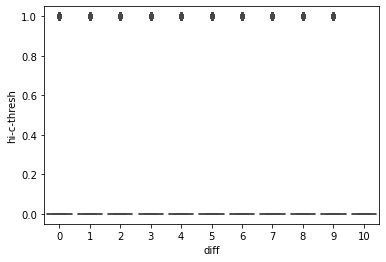

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(data=sig_var, y='hi-c-thresh', x='diff')

<AxesSubplot:xlabel='hi-c-thresh', ylabel='diff'>

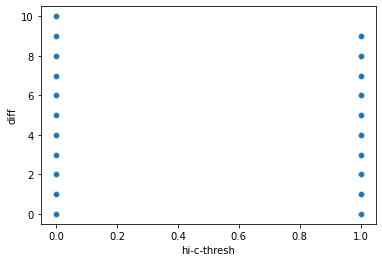

In [132]:
sns.scatterplot(data=sig_var, x='hi-c-thresh', y='diff')

In [187]:
sig_var['hi-c-random'].mean()

12064.169189394763

In [188]:
sig_var['hi-c'].mean()

12638.96410409649